In [1]:
import neutromeratio
import pickle
from neutromeratio.constants import kT
import pandas as pd
from simtk import unit
from neutromeratio.plotting import plot_correlation_analysis, plot_correlation_analysis
from neutromeratio.constants import multiple_stereobonds, exclude_set_ANI, exclude_set_B3LYP, mols_with_charge
import matplotlib.pyplot as plt
import numpy as np
from rdkit import Chem, Geometry
from rdkit.Chem import AllChem
import networkx as nx
import seaborn as sns

[__init__.py:17 - <module>()] Enabling RDKit 2020.03.6 jupyter extensions


[utils.py:141 - _init_num_threads()] NumExpr defaulting to 8 threads.


In [2]:
sns.set_context('paper')
sns.set(color_codes=True)

In [3]:
exp_results = pickle.load(open('../data/results/exp_results.pickle', 'rb'))
#results = pickle.load(open('../data/results/combined_results_in_kT_260120.pickle', 'rb'))

In [4]:
# plot deviation of ANI1x vs wB97 for single conformations
ani_diff = []
qm_diff = []
names = []
failed = 0
for name in exp_results:
    if name in exclude_set_ANI + mols_with_charge + multiple_stereobonds:
        continue
    try:
        f1 = open(f"../data/results/single_point_energy_comparision/{name}_t1.csv")
        f2 = open(f"../data/results/single_point_energy_comparision/{name}_t2.csv")
    except FileNotFoundError:
        failed += 1

        continue
    
    try:
        idx, ani_t1, qm_t1 = f1.readline().split(',')
        idx, ani_t2, qm_t2 = f2.readline().split(',')
        ani_t1 = ((float(ani_t1) * kT).value_in_unit(unit.kilocalorie_per_mole))
        ani_t2 = ((float(ani_t2) * kT).value_in_unit(unit.kilocalorie_per_mole))
        qm_t1 = ((float(qm_t1) * kT).value_in_unit(unit.kilocalorie_per_mole))
        qm_t2 = ((float(qm_t2) * kT).value_in_unit(unit.kilocalorie_per_mole))
        
    except ValueError:
        print(name)
        failed += 1
        continue
    names.append(name)
    names.append(name)
    
    ani_diff.append(ani_t1)
    qm_diff.append(qm_t1)
    ani_diff.append(ani_t2)
    qm_diff.append(qm_t2)

x_list = np.array(qm_diff) 
y_list = np.array(ani_diff)
assert(len(x_list) == len(y_list))

molDWRow_35
molDWRow_567


/home/mwieder/anaconda3/envs/ani36/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/mwieder/anaconda3/envs/ani36/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
[legend.py:1193 - _parse_legend_args()] No handles with labels found to put in legend.
[legend.py:1193 - _parse_legend_args()] No handles with labels found to put in legend.


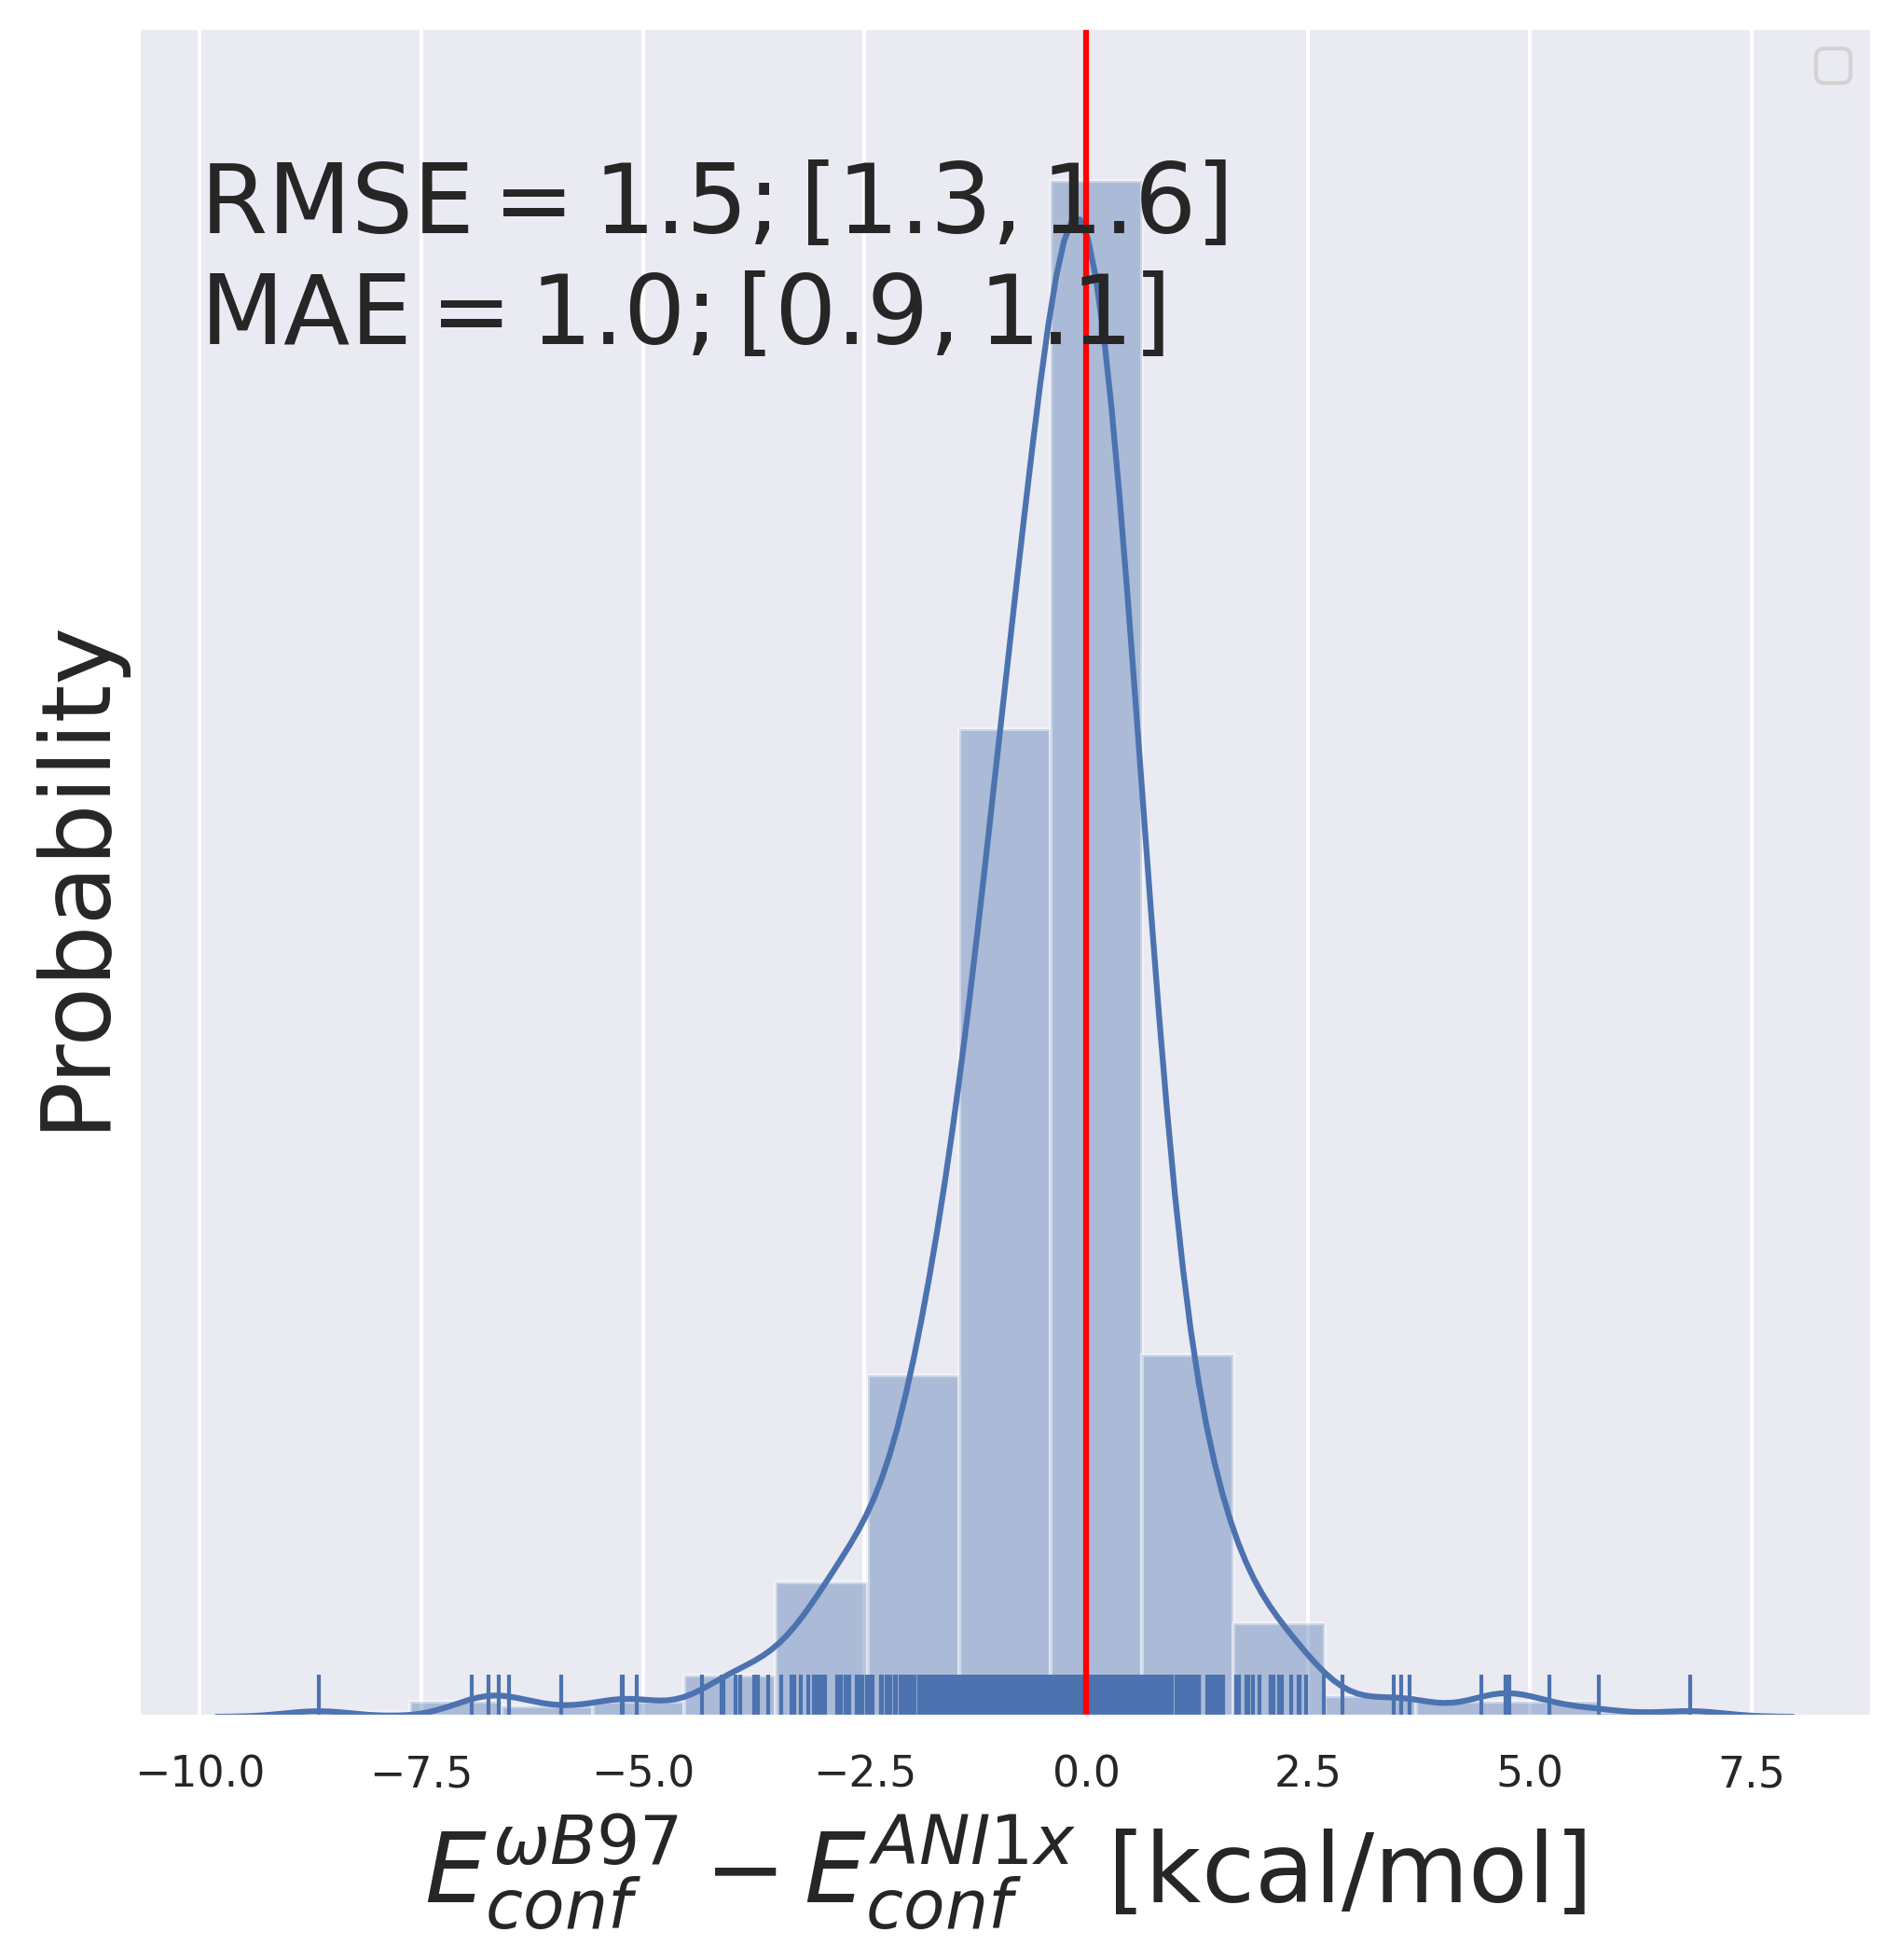

In [5]:
fontsize = 25
import neutromeratio
plt.figure(figsize=[8, 8], dpi=300)

from neutromeratio.analysis import compute_kl_divergence, bootstrap_rmse_r
sns.distplot(x_list-y_list, kde=True, rug=True, bins=15)
rmse, mae, rho = (bootstrap_rmse_r(x_list, y_list, 1000))
kl = compute_kl_divergence(x_list, y_list)
plt.axvline(0,0,15, color='red')
plt.text(-10.0, 0.40, f"RMSE$ = {rmse}$", fontsize=fontsize)
plt.text(-10.0, 0.37, f"MAE$ = {mae}$", fontsize=fontsize)
plt.legend()
plt.yticks([])

plt.xlabel('$E^{\omega B97}_{conf} - E^{ANI1x}_{conf}$ [kcal/mol]', fontsize=fontsize)
plt.ylabel('Probability', fontsize=fontsize)
plt.legend()
plt.show()

/home/mwieder/anaconda3/envs/ani36/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/mwieder/anaconda3/envs/ani36/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
[legend.py:1193 - _parse_legend_args()] No handles with labels found to put in legend.
[legend.py:1193 - _parse_legend_args()] No handles with labels found to put in legend.


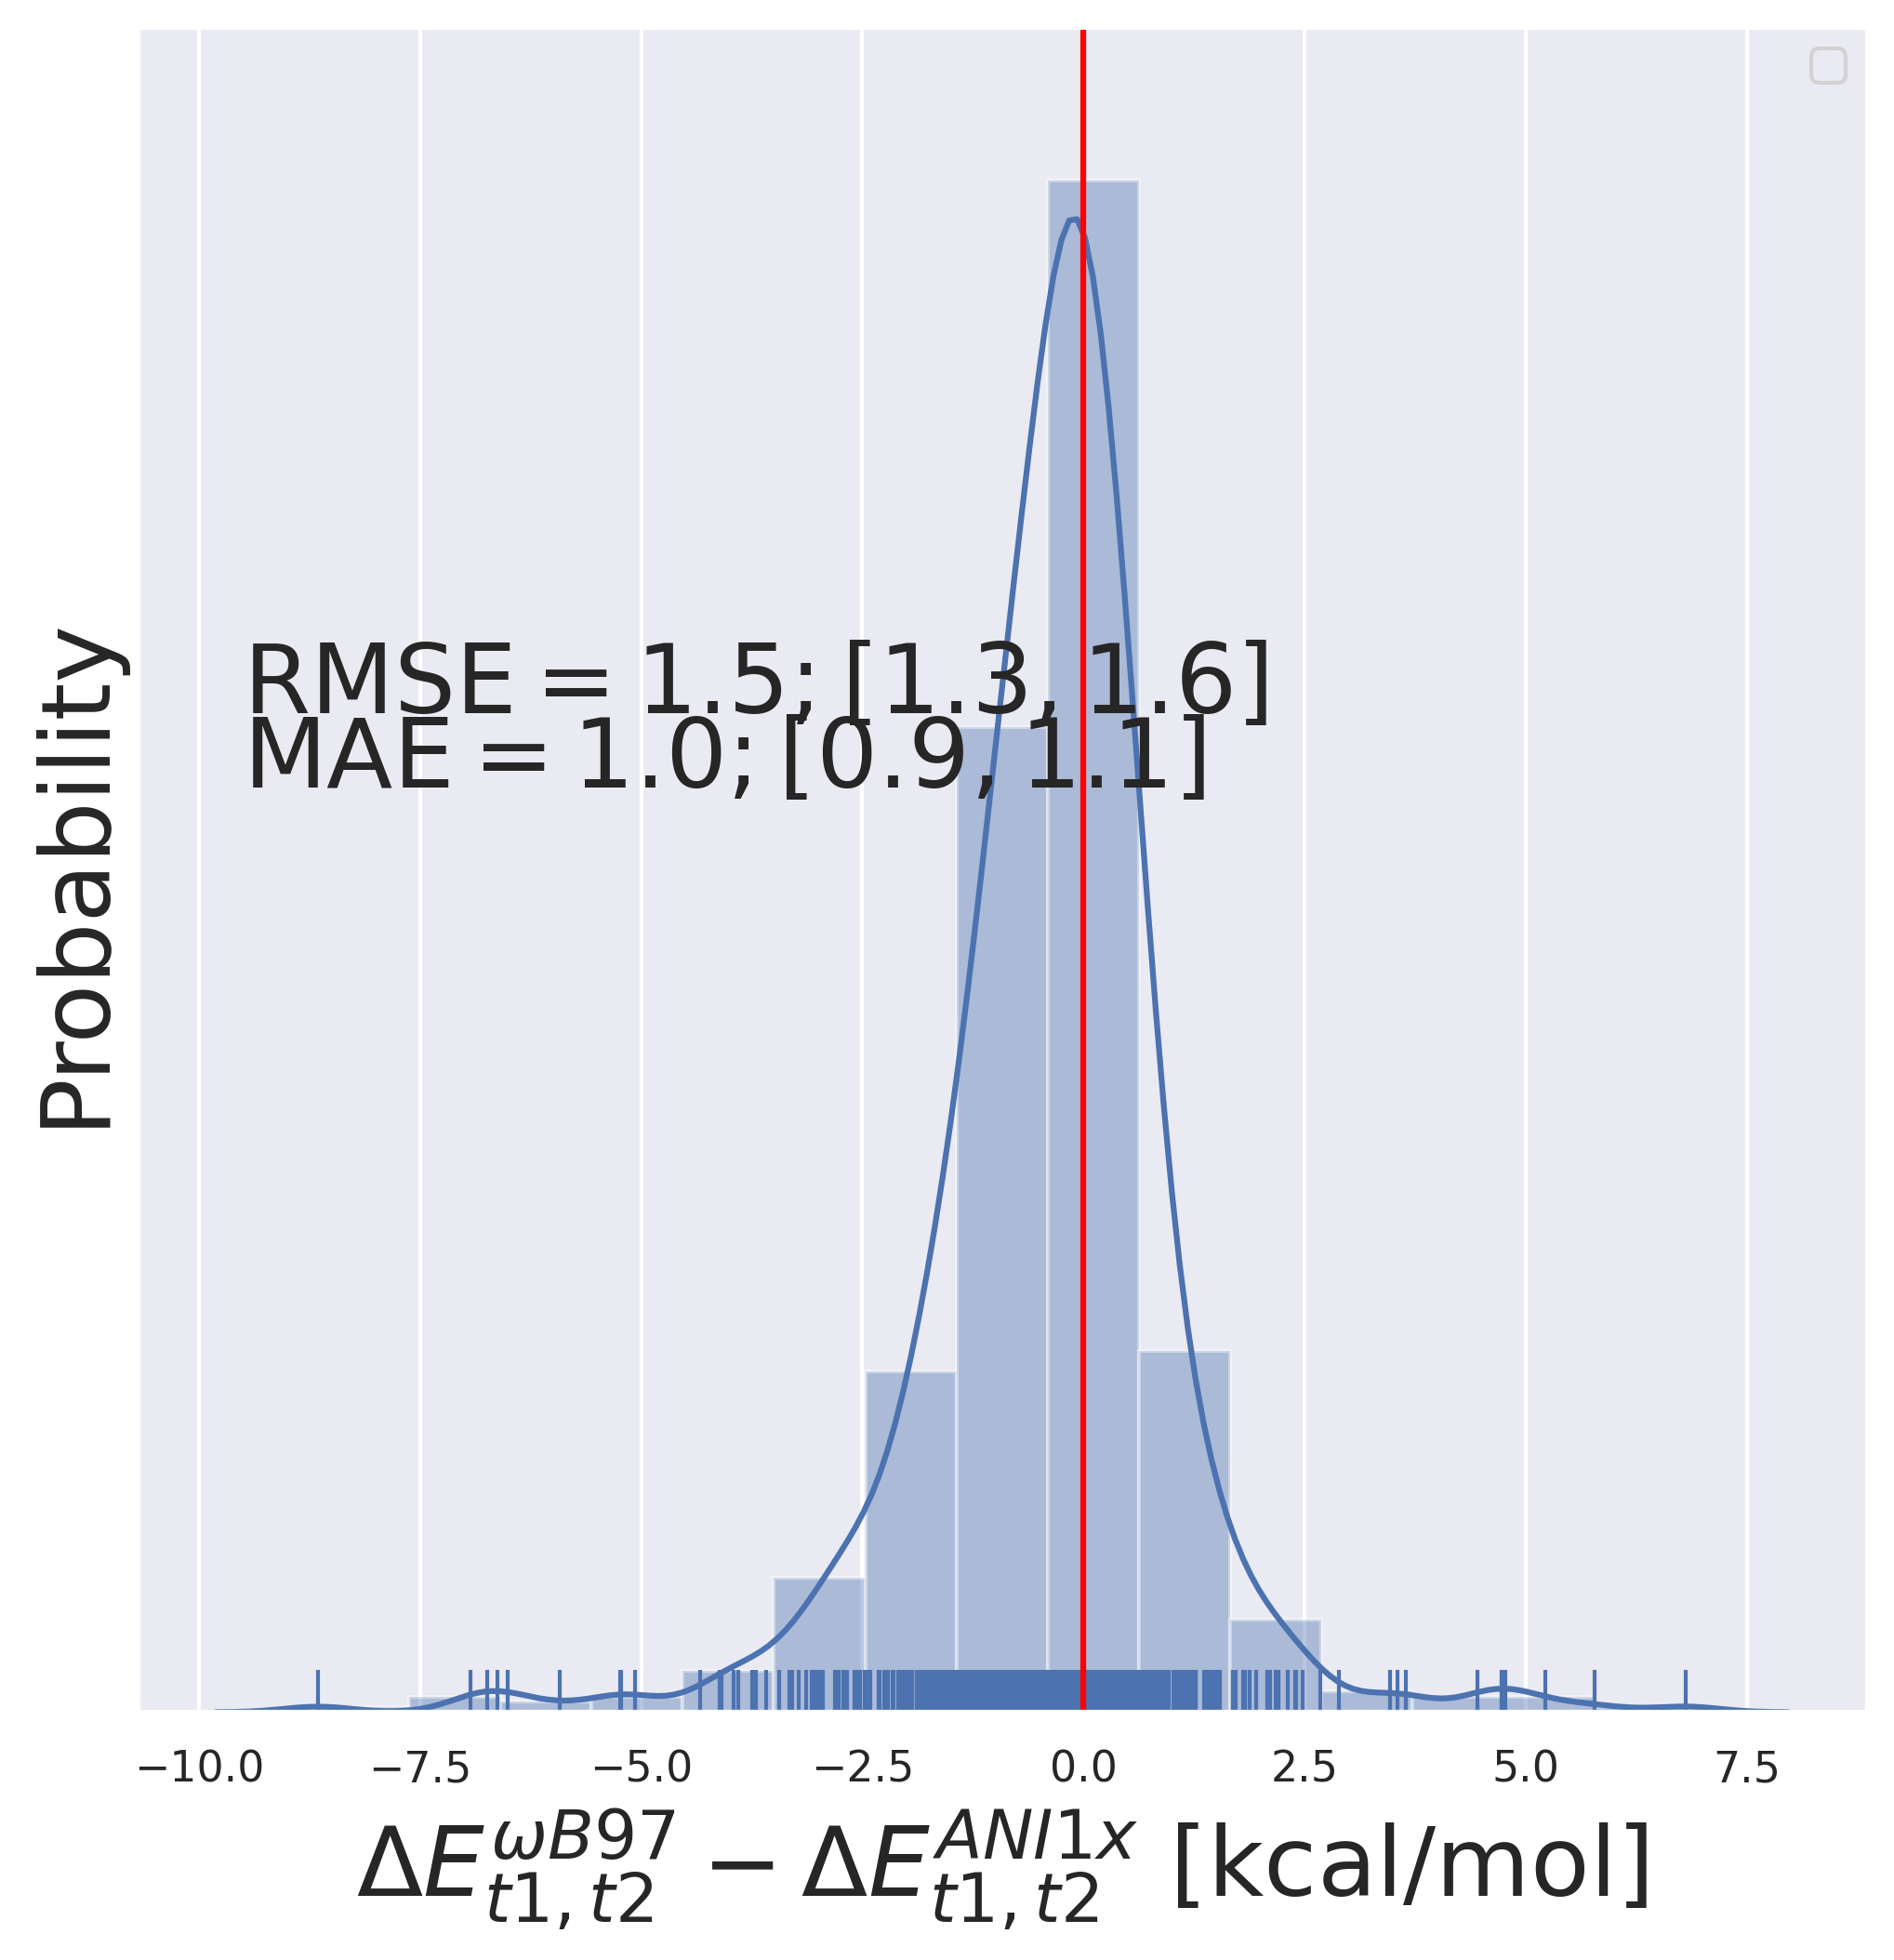

In [6]:
fontsize = 25
plt.figure(figsize=[8, 8], dpi=300)
import neutromeratio
from neutromeratio.analysis import compute_kl_divergence, bootstrap_rmse_r

x_list = np.array(qm_diff)
y_list = np.array(ani_diff)


sns.distplot(x_list-y_list, kde=True, rug=True, bins=15)
rmse, mae, rho = (bootstrap_rmse_r(x_list, y_list, 1000))
kl = compute_kl_divergence(x_list, y_list)
plt.text(-9.5, 0.27, f"RMSE$ = {rmse}$", fontsize=fontsize)
plt.text(-9.5, 0.25, f"MAE$ = {mae}$", fontsize=fontsize)
plt.legend()
plt.axvline(0,0,15, color='red')
plt.yticks([])

plt.xlabel('$\Delta E^{\omega B97}_{t1,t2} - \Delta E^{ANI1x}_{t1,t2}$ [kcal/mol]', fontsize=fontsize)
plt.ylabel('Probability', fontsize=fontsize)
plt.legend()
plt.show()